In [1]:
# Append 'src' directory to import modules from notebooks directory
#################################
import os,sys
src_dir = os.path.join(os.getcwd(), os.pardir)
sys.path.append(src_dir)
##################################

In [2]:
import matplotlib.pyplot as plt
from scipy.io import loadmat
import tensorflow as tf
import numpy as np
from PIL import Image
from src.PatchMatch import PatchMatchCuda as PatchMatchOrig


In [3]:
def normalize_feat_map(feat_map):
    """
    Normalize the feature map along the channels dimension
    
    feat_map is a numpy array with channels along the 2nd dimension
    """
    return feat_map/np.linalg.norm(feat_map,axis=(2),keepdims=True)

In [4]:
mat = loadmat('../weights/imagenet-vgg-verydeep-19.mat')['layers']

In [5]:
convs = []
biases = []


for i in range(0,50):
    try:
        conv = mat[0][i][0][0][2][0][0] 
        bias = mat[0][i][0][0][2][0][1]
        assert type(conv) is np.ndarray
        assert type(bias) is np.ndarray
        convs.append(conv)
        biases.append(bias)
    except:
        pass

In [6]:
def prepare_vgg():
        
    
    img = tf.placeholder(shape=[None,None,None,3],dtype=tf.float32,name='RGB_Input')
    
    img    = img[:,:,:,::-1]
            
    with tf.variable_scope("Conv1_"):
        conv_1_1 = tf.layers.conv2d(inputs=img,
                                    filters=64,
                                    kernel_size=3,
                                    padding='SAME',
                                    name="1",
                                    activation=tf.nn.relu,
                                    kernel_initializer=tf.constant_initializer(convs[0]),
                                    bias_initializer=tf.constant_initializer(biases[0]))
        
        conv_1_2 = tf.layers.conv2d(inputs=conv_1_1,
                                    filters=64,
                                    kernel_size=3,
                                    padding='SAME',
                                    name="2",
                                    activation=tf.nn.relu,
                                    kernel_initializer=tf.constant_initializer(convs[1]),
                                    bias_initializer=tf.constant_initializer(biases[1]))
        
        mpool_1 = tf.layers.max_pooling2d(inputs=conv_1_2, padding='SAME', name='pool',pool_size=2,strides=2)

    with tf.variable_scope("Conv2_"):
        conv_2_1 = tf.layers.conv2d(inputs=mpool_1,
                                    filters=128,
                                    kernel_size=3,
                                    padding='SAME',
                                    name="1",
                                    activation=tf.nn.relu,
                                    kernel_initializer=tf.constant_initializer(convs[2]),
                                    bias_initializer=tf.constant_initializer(biases[2]))
        
        conv_2_2 = tf.layers.conv2d(inputs=conv_2_1,
                                    filters=128,
                                    kernel_size=3,
                                    padding='SAME',
                                    name="2",
                                    activation=tf.nn.relu,
                                    kernel_initializer=tf.constant_initializer(convs[3]),
                                    bias_initializer=tf.constant_initializer(biases[3]))
        
        mpool_2 = tf.layers.max_pooling2d(inputs=conv_2_2, padding='SAME', name='pool',pool_size=2,strides=2)


    with tf.variable_scope("Conv3_"):
        conv_3_1 = tf.layers.conv2d(inputs=mpool_2,
                                    filters=256,
                                    kernel_size=3,
                                    padding='SAME',
                                    name="1",
                                    activation=tf.nn.relu,
                                    kernel_initializer=tf.constant_initializer(convs[4]),
                                    bias_initializer=tf.constant_initializer(biases[4]))
        
        conv_3_2 = tf.layers.conv2d(inputs=conv_3_1,
                                    filters=256,
                                    kernel_size=3,
                                    padding='SAME',
                                    name="2",
                                    activation=tf.nn.relu,
                                    kernel_initializer=tf.constant_initializer(convs[5]),
                                    bias_initializer=tf.constant_initializer(biases[5]))
        
        conv_3_3 = tf.layers.conv2d(inputs=conv_3_2,
                                    filters=256,
                                    kernel_size=3,
                                    padding='SAME',
                                    name="3",
                                    activation=tf.nn.relu,
                                    kernel_initializer=tf.constant_initializer(convs[6]),
                                    bias_initializer=tf.constant_initializer(biases[6]))
        
        conv_3_4 = tf.layers.conv2d(inputs=conv_3_3,
                                    filters=256,
                                    kernel_size=3,
                                    padding='SAME',
                                    name="4",
                                    activation=tf.nn.relu,
                                    kernel_initializer=tf.constant_initializer(convs[7]),
                                    bias_initializer=tf.constant_initializer(biases[7]))
        
        mpool_3 = tf.layers.max_pooling2d(inputs=conv_3_4, padding='SAME', name='pool',pool_size=2,strides=2)



    with tf.variable_scope("Conv4_"):
        conv_4_1 = tf.layers.conv2d(inputs=mpool_3,
                                    filters=512,
                                    kernel_size=3,
                                    padding='SAME',
                                    name="1",
                                    activation=tf.nn.relu,
                                    kernel_initializer=tf.constant_initializer(convs[8]),
                                    bias_initializer=tf.constant_initializer(biases[8]))
                                    
        conv_4_2 = tf.layers.conv2d(inputs=conv_4_1,
                                    filters=512,
                                    kernel_size=3,
                                    padding='SAME',
                                    name="2",
                                    activation=tf.nn.relu,
                                    kernel_initializer=tf.constant_initializer(convs[9]),
                                    bias_initializer=tf.constant_initializer(biases[9]))
                                    
        conv_4_3 = tf.layers.conv2d(inputs=conv_4_2,
                                    filters=512,
                                    kernel_size=3,
                                    padding='SAME',
                                    name="3",
                                    activation=tf.nn.relu,
                                    kernel_initializer=tf.constant_initializer(convs[10]),
                                    bias_initializer=tf.constant_initializer(biases[10]))
                                    
        conv_4_4 = tf.layers.conv2d(inputs=conv_4_3,
                                    filters=512,
                                    kernel_size=3,
                                    padding='SAME',
                                    name="4",
                                    activation=tf.nn.relu,
                                    kernel_initializer=tf.constant_initializer(convs[11]),
                                    bias_initializer=tf.constant_initializer(biases[11]))
                                    
        mpool_4 = tf.layers.max_pooling2d(inputs=conv_4_4, padding='SAME', name='pool',pool_size=2,strides=2)



    with tf.variable_scope("Conv5_"):
        conv_5_1 = tf.layers.conv2d(inputs=mpool_4,
                                    filters=512,
                                    kernel_size=3
                                    ,padding='SAME',
                                    name="1",
                                    activation=tf.nn.relu,
                                    kernel_initializer=tf.constant_initializer(convs[12]),
                                    bias_initializer=tf.constant_initializer(biases[12]))
        
#         conv_5_2 = tf.layers.conv2d(inputs=conv_5_1,
#                                     filters=512,
#                                     kernel_size=3,
#                                     padding='SAME',
#                                     name="2",
#                                     activation=tf.nn.relu,
#                                     kernel_initializer=tf.constant_initializer(convs[13]),
#                                     bias_initializer=tf.constant_initializer(biases[13]))
        
#         conv_5_3 = tf.layers.conv2d(inputs=conv_5_2,
#                                     filters=512,
#                                     kernel_size=3,
#                                     padding='SAME',
#                                     name="3",
#                                     activation=tf.nn.relu,
#                                     kernel_initializer=tf.constant_initializer(convs[14]),
#                                     bias_initializer=tf.constant_initializer(biases[14]))
        
#         conv_5_4 = tf.layers.conv2d(inputs=conv_5_3,
#                                     filters=512,
#                                     kernel_size=3,
#                                     padding='SAME',
#                                     name="4",
#                                     activation=tf.nn.relu,
#                                     kernel_initializer=tf.constant_initializer(convs[15]),
#                                     bias_initializer=tf.constant_initializer(biases[15]))

    return conv_5_1

In [7]:
def prepare_block_5():
        
        conv_4_1_input = tf.placeholder(shape=[None,None,None,512],dtype=tf.float32)
        with tf.variable_scope("Conv4_",reuse=True):
                                    
            conv_4_2 = tf.layers.conv2d(inputs=conv_4_1_input,
                                        filters=512,
                                        kernel_size=3,
                                        padding='SAME',
                                        name="2",
                                        activation=tf.nn.relu,
                                        kernel_initializer=tf.constant_initializer(convs[9]),
                                        bias_initializer=tf.constant_initializer(biases[9]))

            conv_4_3 = tf.layers.conv2d(inputs=conv_4_2,
                                        filters=512,
                                        kernel_size=3,
                                        padding='SAME',
                                        name="3",
                                        activation=tf.nn.relu,
                                        kernel_initializer=tf.constant_initializer(convs[10]),
                                        bias_initializer=tf.constant_initializer(biases[10]))

            conv_4_4 = tf.layers.conv2d(inputs=conv_4_3,
                                        filters=512,
                                        kernel_size=3,
                                        padding='SAME',
                                        name="4",
                                        activation=tf.nn.relu,
                                        kernel_initializer=tf.constant_initializer(convs[11]),
                                        bias_initializer=tf.constant_initializer(biases[11]))

            mpool_4 = tf.layers.max_pooling2d(inputs=conv_4_4, padding='SAME', name='pool',pool_size=2,strides=2)



        with tf.variable_scope("Conv5_",reuse=True):
            conv_5_1 = tf.layers.conv2d(inputs=mpool_4,
                                        filters=512,
                                        kernel_size=3
                                        ,padding='SAME',
                                        name="1",
                                        activation=tf.nn.relu,
                                        kernel_initializer=tf.constant_initializer(convs[12]),
                                        bias_initializer=tf.constant_initializer(biases[12]))

In [8]:
def prepare_block_4():
        conv_3_1_input = tf.placeholder(shape=[None,None,None,256],dtype=tf.float32)
        
        with tf.variable_scope("Conv3_",reuse=True):

            conv_3_2 = tf.layers.conv2d(inputs=conv_3_1_input,
                                        filters=256,
                                        kernel_size=3,
                                        padding='SAME',
                                        name="2",
                                        activation=tf.nn.relu,
                                        kernel_initializer=tf.constant_initializer(convs[5]),
                                        bias_initializer=tf.constant_initializer(biases[5]))

            conv_3_3 = tf.layers.conv2d(inputs=conv_3_2,
                                        filters=256,
                                        kernel_size=3,
                                        padding='SAME',
                                        name="3",
                                        activation=tf.nn.relu,
                                        kernel_initializer=tf.constant_initializer(convs[6]),
                                        bias_initializer=tf.constant_initializer(biases[6]))

            conv_3_4 = tf.layers.conv2d(inputs=conv_3_3,
                                        filters=256,
                                        kernel_size=3,
                                        padding='SAME',
                                        name="4",
                                        activation=tf.nn.relu,
                                        kernel_initializer=tf.constant_initializer(convs[7]),
                                        bias_initializer=tf.constant_initializer(biases[7]))

            mpool_3 = tf.layers.max_pooling2d(inputs=conv_3_4, padding='SAME', name='pool',pool_size=2,strides=2)



        with tf.variable_scope("Conv4_",reuse=True):
            conv_4_1 = tf.layers.conv2d(inputs=mpool_3,
                                        filters=512,
                                        kernel_size=3,
                                        padding='SAME',
                                        name="1",
                                        activation=tf.nn.relu,
                                        kernel_initializer=tf.constant_initializer(convs[8]),
                                        bias_initializer=tf.constant_initializer(biases[8]))
        
        

In [14]:
def prepare_block_3():
    conv_2_1_input = tf.placeholder(shape=[None,None,None,128],dtype=tf.float32)


    with tf.variable_scope("Conv2_",reuse=True):

        conv_2_2 = tf.layers.conv2d(inputs=conv_2_1_input,
                                        filters=128,
                                        kernel_size=3,
                                        padding='SAME',
                                        name="2",
                                        activation=tf.nn.relu,
                                        kernel_initializer=tf.constant_initializer(convs[3]),
                                        bias_initializer=tf.constant_initializer(biases[3]))

        mpool_2 = tf.layers.max_pooling2d(inputs=conv_2_2, padding='SAME', name='pool',pool_size=2,strides=2)


    with tf.variable_scope("Conv3_",reuse=True):
        conv_3_1 = tf.layers.conv2d(inputs=mpool_2,
                                    filters=256,
                                    kernel_size=3,
                                    padding='SAME',
                                    name="1",
                                    activation=tf.nn.relu,
                                    kernel_initializer=tf.constant_initializer(convs[4]),
                                    bias_initializer=tf.constant_initializer(biases[4]))

In [18]:
def prepare_block_2():
    conv_1_1_input = tf.placeholder(shape=[None,None,None,64],dtype=tf.float32)
    
    with tf.variable_scope("Conv1_",reuse=True):
        
        conv_1_2 = tf.layers.conv2d(inputs=conv_1_1_input,
                                    filters=64,
                                    kernel_size=3,
                                    padding='SAME',
                                    name="2",
                                    activation=tf.nn.relu,
                                    kernel_initializer=tf.constant_initializer(convs[1]),
                                    bias_initializer=tf.constant_initializer(biases[1]))
        
        mpool_1 = tf.layers.max_pooling2d(inputs=conv_1_2, padding='SAME', name='pool',pool_size=2,strides=2)

    with tf.variable_scope("Conv2_",reuse=True):
        conv_2_1 = tf.layers.conv2d(inputs=mpool_1,
                                    filters=128,
                                    kernel_size=3,
                                    padding='SAME',
                                    name="1",
                                    activation=tf.nn.relu,
                                    kernel_initializer=tf.constant_initializer(convs[2]),
                                    bias_initializer=tf.constant_initializer(biases[2]))

In [19]:
img = np.array(Image.open('../data/raw/ava.png').convert('RGB').resize((224,224)),dtype=np.float32)
img[:,:,2] -= 103.939
img[:,:,1] -= 116.779
img[:,:,0] -= 123.68

batch = np.expand_dims(img,axis=0)

In [20]:
img1 = np.array(Image.open('../data/raw/mona.png').convert('RGB').resize((224,224)),dtype=np.float32)
img1[:,:,2] -= 103.939
img1[:,:,1] -= 116.779
img1[:,:,0] -= 123.68

batch1 = np.expand_dims(img1,axis=0)

In [21]:
sess = tf.InteractiveSession(graph=tf.Graph())
final_conv = prepare_vgg()
prepare_block_5()
prepare_block_4()
prepare_block_3()
prepare_block_2()


writer = tf.summary.FileWriter("../logs",sess.graph)

sess.run(tf.global_variables_initializer())

In [62]:

output = sess.run('Conv5_/1/Relu:0',feed_dict={'RGB_Input:0':batch})
output1 = sess.run('Conv5_/1/Relu:0',feed_dict={'RGB_Input:0':batch1})



In [63]:
output = output.squeeze()
output1 = output1.squeeze()

In [43]:
feata = normalize_feat_map(output)
feataa = normalize_feat_map(output)

featb = normalize_feat_map(output1)
featbb = normalize_feat_map(output1)

In [44]:
pm5ab = PatchMatchOrig(feata,feataa,featb,featbb, 3)
# plt.imshow(pm5ab.visualize())
pm5ab.propagate(iters=5,rand_search_radius=5000)

called


In [45]:
recon = pm5ab.reconstruct_image(img1)
recon[:,:,2] += 103.939
recon[:,:,1] += 116.779
recon[:,:,0] += 123.68
recon = np.ndarray.astype(recon,np.uint8)
# recon = np.clip(recon,0,255)


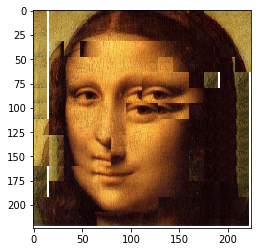

In [46]:
plt.imshow(recon)

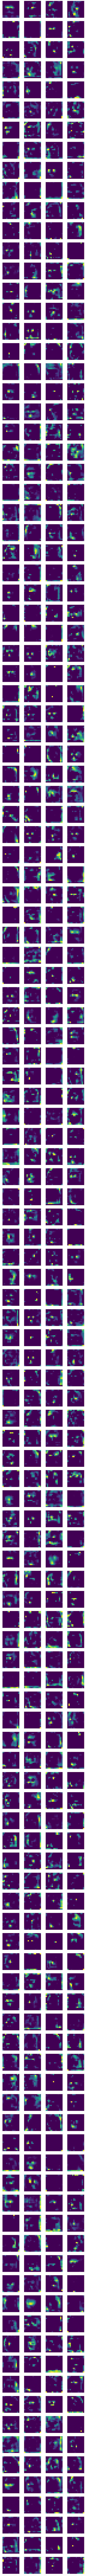

In [64]:
w=10
h=10
fig=plt.figure(figsize=(16, 512))
columns = 4
rows = 512//4
for i in range(1, columns*rows +1):
    img = output1[:,:,i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis('off')
plt.show()


In [ ]:
output1.shape

In [ ]:
[conv.shape for conv in convs]

In [59]:
output[2].shape

(1, 56, 56, 256)